### Kernel

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage.transform import rescale
from scipy.signal import convolve2d

### Read Image

In [2]:
img = imread('./Data/SIFT/sample2.png')

### Convolve
Apply the convolution function in all channels of the image

In [3]:
def rgb_convolve2d(image, kernel):
    red = convolve2d(image[:,:,0], kernel, 'valid')
    green = convolve2d(image[:,:,1], kernel, 'valid')
    blue = convolve2d(image[:,:,2], kernel, 'valid')
    return np.stack([red, green, blue], axis=2)

### Rescale & Grayscale

In [4]:
r_scaled = rescale(img[:,:,0], 0.50)
g_scaled = rescale(img[:,:,1], 0.50)
b_scaled = rescale(img[:,:,2], 0.50)
img_scaled = np.stack([r_scaled, g_scaled, b_scaled], axis=2)
img_gray = rescale(rgb2gray(img), 0.50)

### Edge Detection

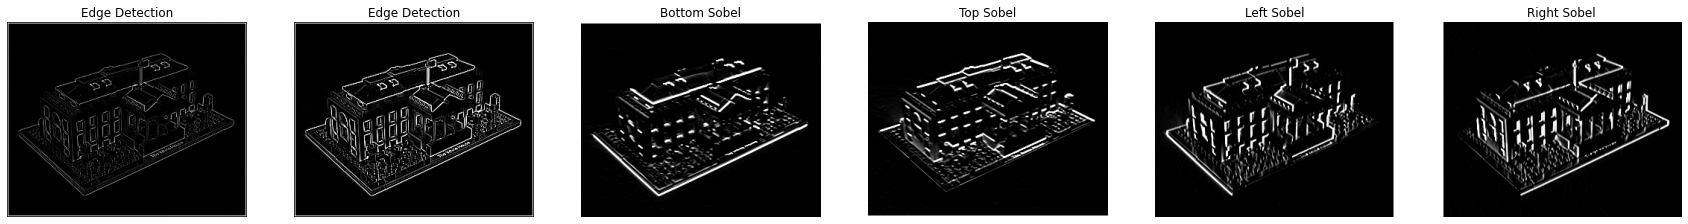

In [5]:
kernel1 = np.array([[0, -1, 0],
                    [-1, 4, -1],
                    [0, -1, 0]])

kernel2 = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])

kernel3 = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

kernel4 = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])

kernel5 = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]])

kernel6 = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

kernels = [kernel1, kernel2, kernel3, kernel4, kernel5, kernel6]
kernel_name = ['Edge Detection', 'Edge Detection', 'Bottom Sobel', 'Top Sobel', 'Left Sobel', 'Right Sobel']

figure, axis = plt.subplots(1, 6, figsize=(30,5))

for kernel, name, ax in zip(kernels, kernel_name, axis.flatten()):
     conv_im1 = convolve2d(img_gray, kernel[::-1, ::-1]).clip(0,1)
     ax.imshow(abs(conv_im1), cmap='gray'), ax.set_title(name), ax.axis('off')

### Other Types

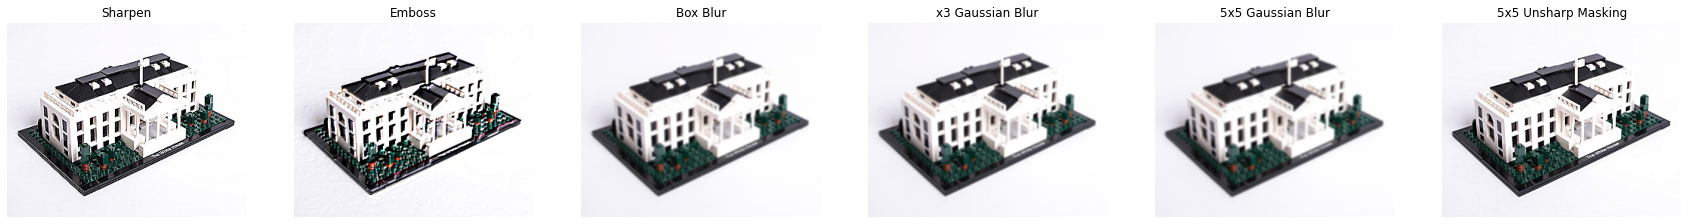

In [6]:
kernel7 = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])

kernel8 =  np.array([[-2, -1, 0],
                     [-1,  1, 1],
                     [ 0,  1, 2]])

kernel9 = (1 / 9.0) * np.array([[1, 1, 1],
                                [1, 1, 1],
                                [1, 1, 1]])

kernel10 = (1 / 16.0) * np.array([[1, 2, 1],
                                  [2, 4, 2],
                                  [1, 2, 1]])

kernel11 = (1 / 256.0) * np.array([[1, 4, 6, 4, 1],
                                   [4, 16, 24, 16, 4],
                                   [6, 24, 36, 24, 6],
                                   [4, 16, 24, 16, 4],
                                   [1, 4, 6, 4, 1]])

kernel12 = -(1 / 256.0) * np.array([[1, 4, 6, 4, 1],
                                   [4, 16, 24, 16, 4],
                                   [6, 24, -476, 24, 6],
                                   [4, 16, 24, 16, 4],
                                   [1, 4, 6, 4, 1]])

kernels = [kernel7, kernel8, kernel9, kernel10, kernel11, kernel12]
kernel_name = ['Sharpen', 'Emboss', 'Box Blur', 'x3 Gaussian Blur', '5x5 Gaussian Blur', '5x5 Unsharp Masking']

figure, axis = plt.subplots(1, 6, figsize=(30,5))

for kernel, name, ax in zip(kernels, kernel_name, axis.flatten()):
     conv_im1 = rgb_convolve2d(img_scaled, kernel[::-1, ::-1]).clip(0,1)
     ax.imshow(abs(conv_im1), cmap='gray'), ax.set_title(name), ax.axis('off')